# EDA

In [8]:
import sys
sys.path.append('..')

from fast_ml.feature_selection import get_constant_features
import joblib
import matplotlib.pyplot as plt
import missingno
import pandas as pd
import seaborn as sns

import src

In [2]:
train_data = joblib.load(src.constants.TRAIN_DATA_PATH).set_index('customer_ID')

In [3]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 368710 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     368710 non-null  datetime64[ns]
 1    P_2     366190 non-null  float16       
 2    D_39    368710 non-null  float16       
 3    B_1     368710 non-null  float16       
 4    B_2     368679 non-null  float16       
 5    R_1     368710 non-null  float16       
 6    S_3     301057 non-null  float16       
 7    D_41    368679 non-null  float16       
 8    B_3     368679 non-null  float16       
 9    D_42    48157 non-null   float16       
 10   D_43    260503 non-null  float16       
 11   D_44    350715 non-null  float16       
 12   B_4     368710 non-null  float16       
 13   D_45    368679 non-null  float16       
 14   B_5     368710 non-null  float

In [4]:
train_data['target'].mean()

0.25994141737408805

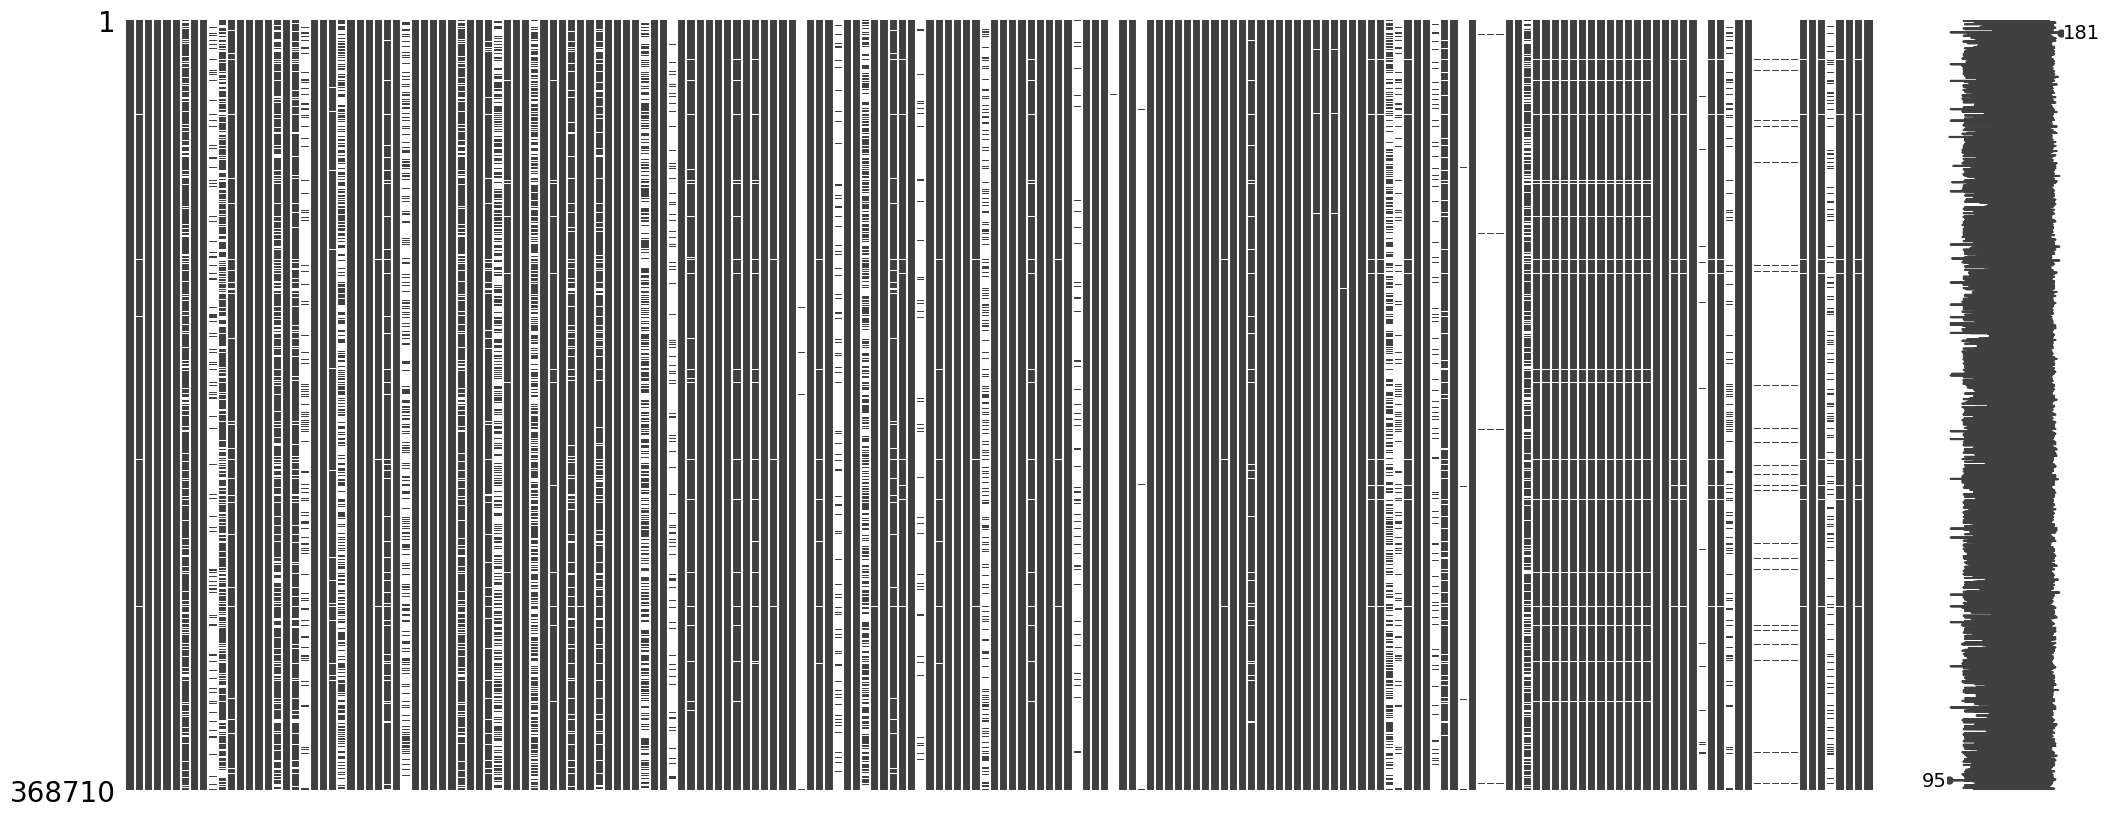

In [5]:
ax = missingno.matrix(train_data)

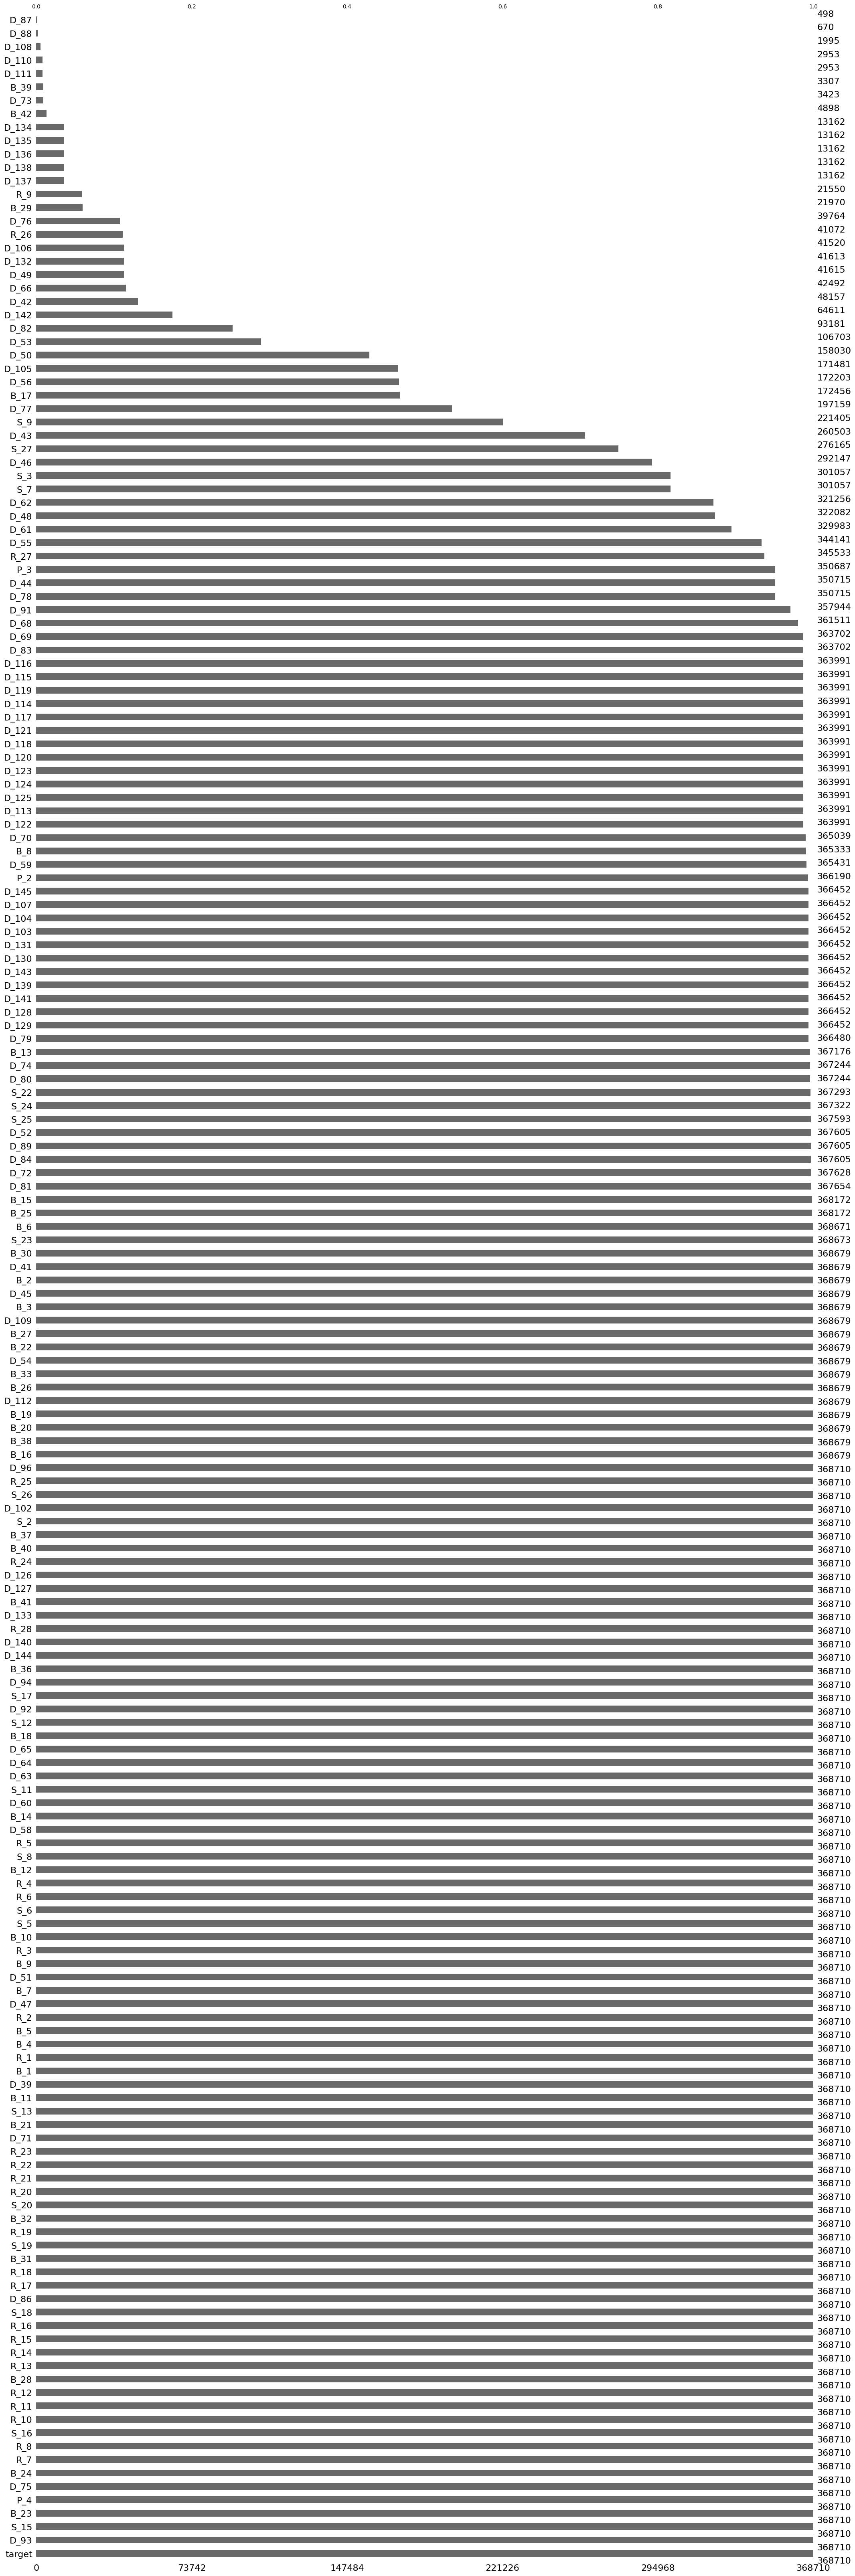

In [6]:
ax = missingno.bar(train_data, sort='descending')

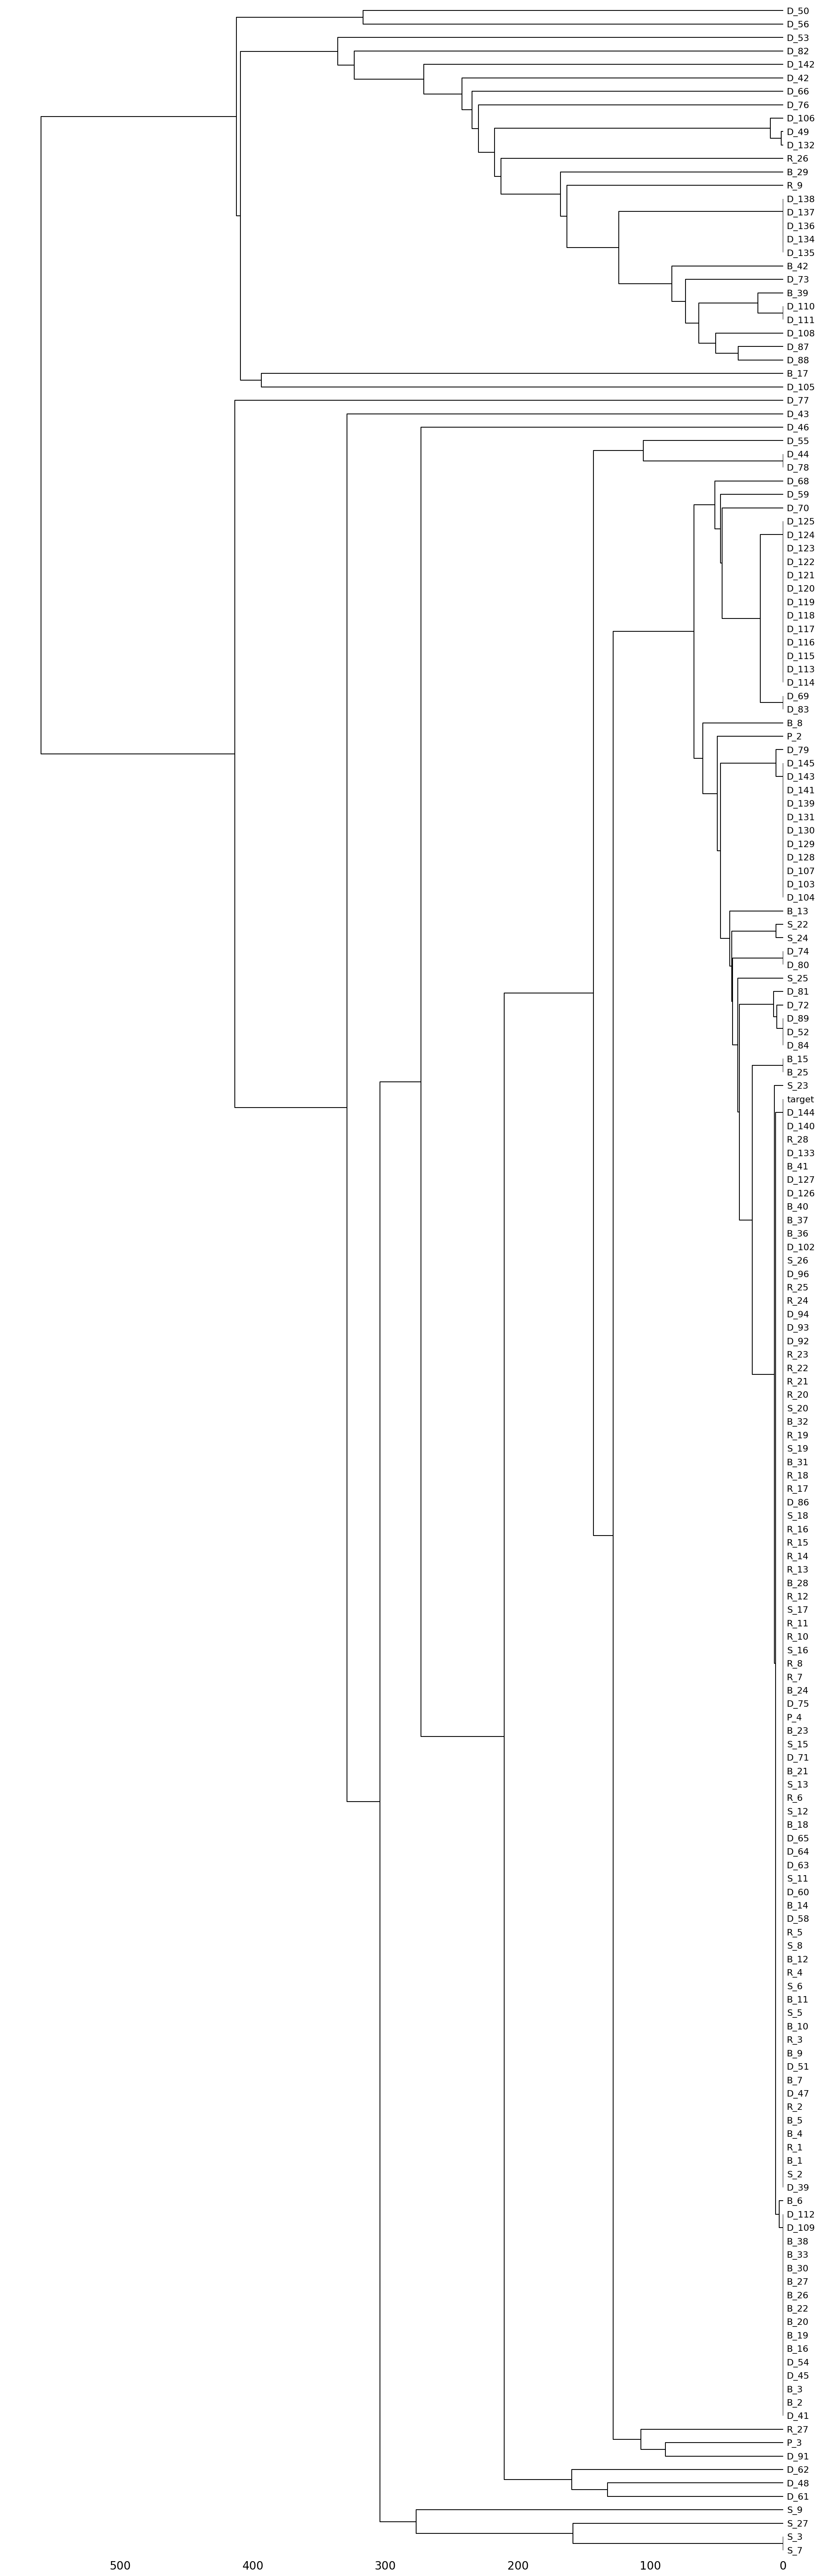

In [14]:
ax = missingno.dendrogram(train_data)

In [9]:
get_constant_features(train_data, threshold=.75)

,Desc,Var,Value,Perc
0,Quasi Constant,D_87,NaN,99.864935
1,Quasi Constant,D_88,NaN,99.818285
2,Quasi Constant,D_108,NaN,99.458924
3,Quasi Constant,B_31,1.0,99.415530
4,Quasi Constant,D_110,NaN,99.199100
5,Quasi Constant,D_111,NaN,99.199100
6,Quasi Constant,B_39,NaN,99.103089
7,Quasi Constant,D_73,NaN,99.071628
8,Quasi Constant,B_42,NaN,98.671585
9,Quasi Constant,D_116,0.0,98.429660


In [10]:
S_FEATURES = [feature for feature in train_data.columns if feature.startswith('S_')]

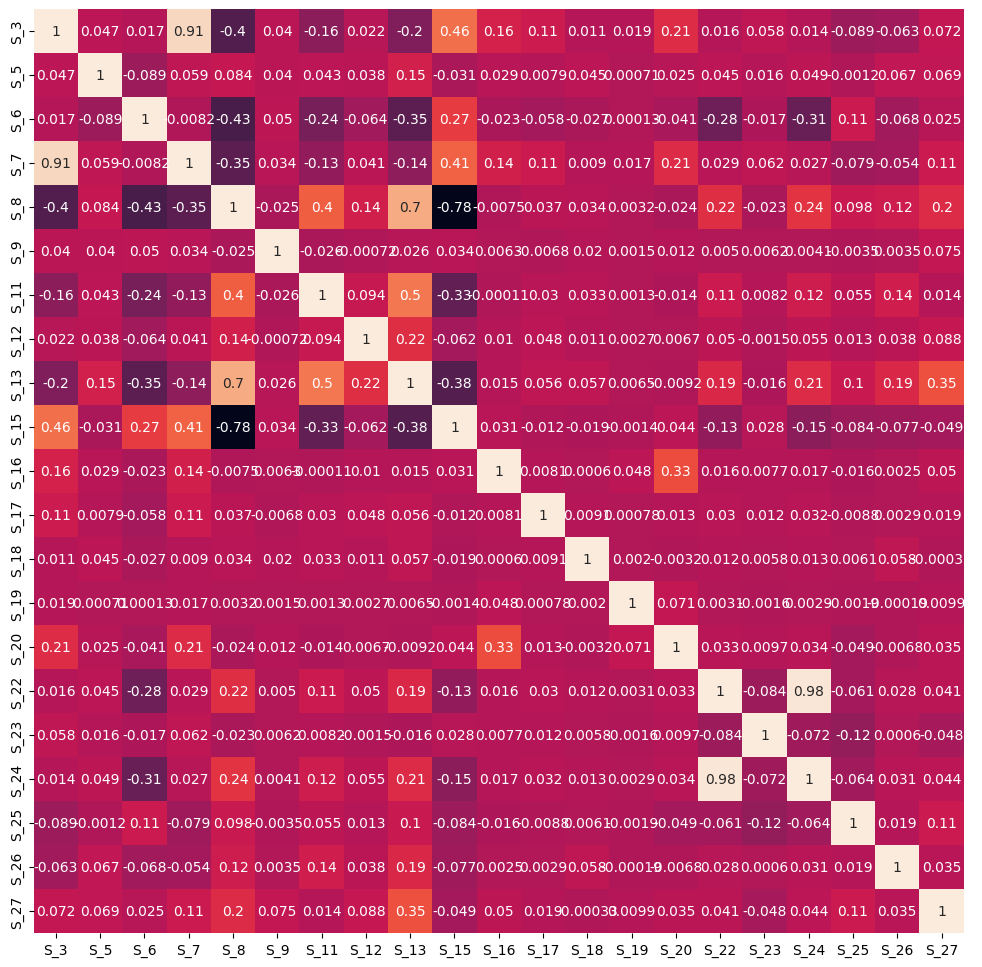

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    train_data[S_FEATURES].select_dtypes(include='float16').corr(method='pearson'),
    annot=True,
    cbar=False,
)
plt.show()

<Axes: xlabel='S_7', ylabel='S_3'>

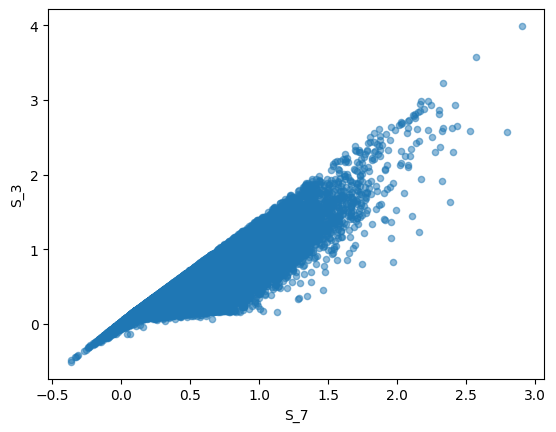

In [12]:
train_data.plot.scatter('S_7', 'S_3', alpha=0.5)

<Axes: xlabel='S_24', ylabel='S_22'>

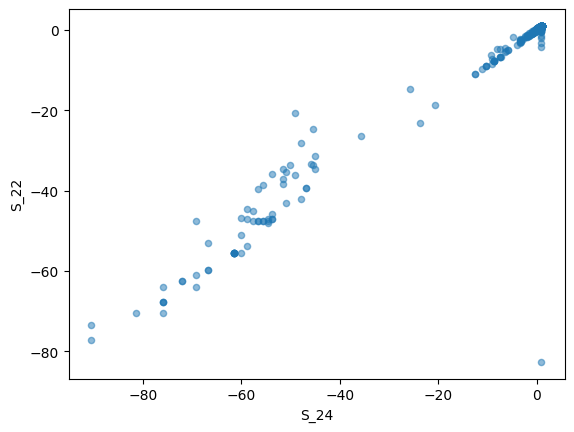

In [13]:
train_data.plot.scatter('S_24', 'S_22', alpha=0.5)